In [72]:
import random
import matplotlib.pyplot as plt

# Hi-Lo Card Game

A card game where players guess if a certain face-up card is higher or lower in value than a certain face-down card!

## Game Logic

HiLoGame class:
1. Initializes the game with a specified number of decks (default is 1).
2. Creates and shuffles the deck of cards.
3. Provides methods to draw cards and compare them.
4. Implements the main game loop in the play method, which takes an agent's guess as an input each turn and returns the final score.

The longer a streak the agent has, the higher their score will be. The moment they make a wrong guess, they lose and their score is tallied.

In [73]:
class HiLoGame:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.deck = self.create_deck()
        self.current_card = None

    def create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        deck = [(rank, suit) for suit in suits for rank in ranks] * self.num_decks
        random.shuffle(deck)
        return deck

    def draw_card(self):
        if len(self.deck) > 0:
            self.current_card = self.deck.pop()
            return self.current_card
        else:
            return None

    def compare_cards(self, card1, card2):
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return ranks.index(card1[0]) < ranks.index(card2[0])

    def play(self, agent):
        score = 0
        self.current_card = self.draw_card()
    
        while self.current_card is not None:
            print(f"Current card: {self.current_card}")
            
            if isinstance(agent, MinimaxAgent) or isinstance(agent, MonteCarloAgent):
                guess = agent.make_guess(self.current_card, self.deck)
            else:
                guess = agent.make_guess(self.current_card)
            
            next_card = self.draw_card()
    
            if next_card is None:
                break
    
            print(f"Next card: {next_card}")
    
            if (guess == 'h' and self.compare_cards(self.current_card, next_card)) or \
               (guess == 'l' and not self.compare_cards(self.current_card, next_card)):
                score += 1
                print("Correct guess!")
            else:
                print("Incorrect guess.")
                break
    
            self.current_card = next_card
    
        print(f"Game over. Final score: {score}")
        return score

## Agents

### Random Agent

In [74]:
# Mainly used originally to debug the HiLo game logic 
class RandomAgent:
    def make_guess(self, current_card):
        return random.choice(['h', 'l'])

### Minimax Agent

 A smart player who tries to make the best guess by thinking ahead. It looks at the current card and the remaining cards in the deck, and it imagines what could happen if it makes a certain guess.

In [75]:
class MinimaxAgent:
    def __init__(self, depth):
        self.depth = depth

    def make_guess(self, current_card, deck):
        _, guess = self.minimax(current_card, deck, self.depth, True)
        return guess

    def minimax(self, current_card, deck, depth, is_maximizing):
        if depth == 0 or len(deck) == 0:
            return 0, None
    
        if is_maximizing:
            max_score = float('-inf')
            best_guess = None
            for guess in ['h', 'l']:
                next_card = deck[0]
                next_deck = deck[1:]
                score = self.calculate_reward(current_card, next_card, guess)
                next_score, _ = self.minimax(next_card, next_deck, depth - 1, False)
                score += next_score
                if score > max_score:
                    max_score = score
                    best_guess = guess
            return max_score, best_guess
        else:
            min_score = float('inf')
            best_guess = None
            for guess in ['h', 'l']:
                next_card = deck[0]
                next_deck = deck[1:]
                score = self.calculate_reward(current_card, next_card, guess)
                next_score, _ = self.minimax(next_card, next_deck, depth - 1, True)
                score += next_score
                if score < min_score:
                    min_score = score
                    best_guess = guess
            return min_score, best_guess

    def calculate_reward(self, current_card, next_card, guess):
        if (guess == 'h' and self.is_next_card_higher(current_card, next_card)) or \
           (guess == 'l' and not self.is_next_card_higher(current_card, next_card)):
            return 1
        else:
            return -1

    def is_next_card_higher(self, card1, card2):
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return ranks.index(card1[0]) < ranks.index(card2[0])

### Monte Carlo Agent

Performs a specified number of simulations to estimate the probability of the next card being higher or lower than the current card. It shuffles the remaining deck in each simulation, draws the next card, and updates the win counts accordingly. Finally, it returns the guess based on which outcome (higher or lower) has more wins.

In [76]:
class MonteCarloAgent:
    def __init__(self, num_simulations):
        self.num_simulations = num_simulations

    def make_guess(self, current_card, deck):
        higher_wins = 0
        lower_wins = 0

        for _ in range(self.num_simulations):
            simulated_deck = deck[:]
            random.shuffle(simulated_deck)
            next_card = simulated_deck[0]

            if self.is_next_card_higher(current_card, next_card):
                higher_wins += 1
            else:
                lower_wins += 1

        if higher_wins > lower_wins:
            return 'h'
        else:
            return 'l'

    def is_next_card_higher(self, card1, card2):
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return ranks.index(card1[0]) < ranks.index(card2[0])

## Playing the game

Run the line below to run and get a comparison of all the agents compared.

Current card: ('Jack', 'Diamonds')
Next card: ('2', 'Spades')
Incorrect guess.
Game over. Final score: 0
Current card: ('Jack', 'Hearts')
Next card: ('King', 'Spades')
Correct guess!
Current card: ('King', 'Spades')
Next card: ('5', 'Clubs')
Correct guess!
Current card: ('5', 'Clubs')
Next card: ('7', 'Diamonds')
Correct guess!
Current card: ('7', 'Diamonds')
Next card: ('5', 'Spades')
Incorrect guess.
Game over. Final score: 3
Current card: ('8', 'Clubs')
Next card: ('10', 'Hearts')
Incorrect guess.
Game over. Final score: 0
Current card: ('8', 'Hearts')
Next card: ('King', 'Hearts')
Incorrect guess.
Game over. Final score: 0
Current card: ('Queen', 'Clubs')
Next card: ('7', 'Clubs')
Correct guess!
Current card: ('7', 'Clubs')
Next card: ('8', 'Diamonds')
Correct guess!
Current card: ('8', 'Diamonds')
Next card: ('3', 'Diamonds')
Correct guess!
Current card: ('3', 'Diamonds')
Next card: ('Ace', 'Clubs')
Incorrect guess.
Game over. Final score: 3
Current card: ('10', 'Hearts')
Next car

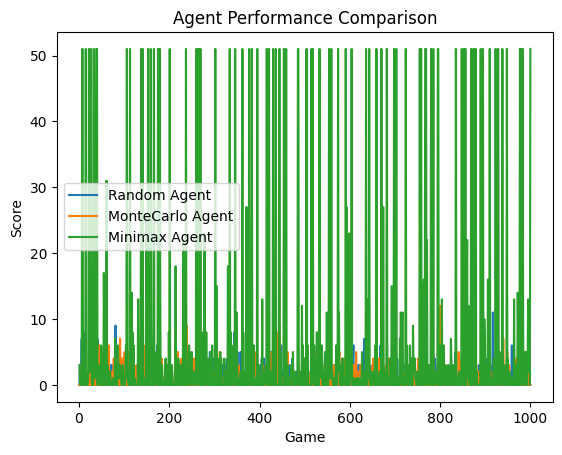

In [77]:
def run_simulation(num_games, agent):
    scores = []
    for i in range(num_games):
        game = HiLoGame()
        score = game.play(agent)
        scores.append(score)
    return scores

def print_statistics(agent_scores):
    for agent_name, scores in agent_scores.items():
        num_games = len(scores)
        total_score = sum(scores)
        avg_score = total_score / num_games
        print(f"\nAgent: {agent_name}")
        print(f"Number of games played: {num_games}")
        print(f"Total score: {total_score}")
        print(f"Average score per game: {avg_score:.2f}")

def compare_agents(num_games, agents):
    agent_scores = {}
    for agent_name, agent in agents.items():
        scores = run_simulation(num_games, agent)
        agent_scores[agent_name] = scores
    return agent_scores

def plot_agent_comparison(agent_scores):
    for agent_name, scores in agent_scores.items():
        plt.plot(range(1, len(scores) + 1), scores, label=agent_name)
    plt.xlabel('Game')
    plt.ylabel('Score')
    plt.title('Agent Performance Comparison')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    num_games = 1000  # Set the number of games to play
    agents = {
        'Random Agent': RandomAgent(),
        'MonteCarlo Agent': MonteCarloAgent(1000),
        'Minimax Agent': MinimaxAgent(2),
    }
    agent_scores = compare_agents(num_games, agents)
    print_statistics(agent_scores)
    plot_agent_comparison(agent_scores)